# Study of Bayesian Classification - Hedi SAGAR

In [7]:
# Libraries
import numpy as np
import scipy as sp
from scipy.stats import norm
import matplotlib.pyplot as plt

## Parameters

In [8]:
# Parameters
N = 2
M = 10000
pi1 = 0.2
pi0 = 1-pi1
theta = np.ones(N)/np.sqrt(N)
sigma = 1
gamma = 1e-3

## Functions

In [9]:
### Function to generate realizations of X
def gen_data(N,M,pi0,theta,sigma):
    # Initialization
    U = np.random.randn(M,N)
    X = np.zeros([M,N])
    Hyp = np.zeros(M)
    
    for k in range(M):
        # Samples hypothesis and generate data according to the distribution
        val = np.random.rand()
        if(val < pi0):
            Hyp[k] = 0
            X[k] = U[k] * sigma
        else:
            Hyp[k] = 1 
            X[k] = U[k]*sigma + theta 
        
    return X,Hyp

In [10]:
### Function for hypothesis testing with ***MPE***
def test_mpe(X,theta,sigma,pi0):
    # Initialization
    m,n = np.shape(X)
    Hyp_est = np.zeros(m)
    threshold = sigma**2 * np.log(pi0/(1-pi0)) + np.linalg.norm(theta)**2 / 2 
    
    # Test for each sample
    for k in range(m):
        val = np.dot(X[k].transpose(),theta)
        if(val > threshold):
            Hyp_est[k] = 1
        else:
            Hyp_est[k] = 0
        
    return Hyp_est

In [11]:
### Function for hypothesis testing with ***NP***
def test_np(X,theta,sigma,gamma):
    # Initialization
    m,n = np.shape(X)
    Hyp_est = np.zeros(m)
    threshold = sigma * np.linalg.norm(theta)*sp.stats.norm.ppf(1-gamma)
    
    # Test for each sample
    for k in range(m):
        val = np.dot(X[k].transpose(),theta)
        if(val > threshold):
            Hyp_est[k] = 1
        else:
            Hyp_est[k] = 0
        
    return Hyp_est

## Simulation results

In [12]:
### Code for simulations and error probability evaluation, MPE
A = np.arange(1,8,0.5)
Pe_th_MPE = np.zeros(np.size(A))
Pe_MPE = np.zeros(np.size(A))
Pe_th_NP = np.zeros(np.size(A))
Pe_NP = np.zeros(np.size(A))

for a in range(np.size(A)):
    # Generates data
    theta_up = A[a]*theta
    X,Hyp = gen_data(N,M,pi0,theta_up,sigma)

    # Applies the hypothesis tests
    Hyp_est = test_mpe(X,theta_up,sigma,pi0)
    Hyp_est_np = test_np(X,theta_up,sigma,gamma)

    # Computes error rate from simulations
    Pe_MPE[a] = np.sum(np.abs(Hyp_est - Hyp)) / M
    Pe_NP[a] = np.sum(np.abs(Hyp_est_np - Hyp)) / M

    # Computes error probability from the analytical formula
    rho = np.linalg.norm(theta_up)/sigma
    Pe_th_MPE[a] = pi0*(1 - sp.stats.norm.cdf(1/rho * np.log(pi0/(1-pi0)) + rho/2 )) + pi1 * (sp.stats.norm.cdf(1/rho * np.log(pi0/(1-pi0)) - rho/2 ))
    Pe_th_NP[a] = pi0*gamma + pi1 * sp.stats.norm.cdf(sp.stats.norm.ppf(1-gamma) - rho) 

Text(0, 0.5, 'Pe')

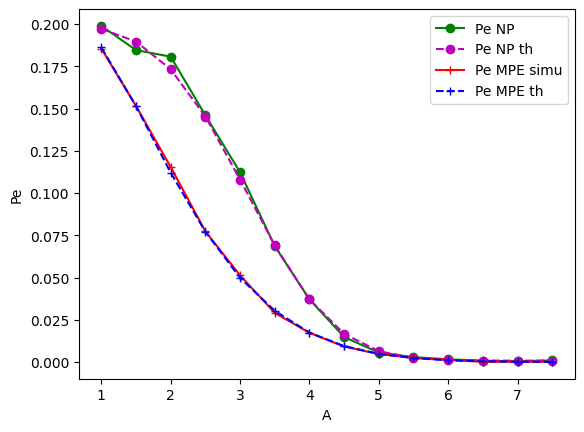

In [13]:
### Plot the results
plt.plot(A,Pe_NP,'g-o',label='Pe NP')
plt.plot(A,Pe_th_NP,'m--o',label='Pe NP th')
plt.plot(A,Pe_MPE,'r-+',label='Pe MPE simu')
plt.plot(A,Pe_th_MPE,'b--+',label='Pe MPE th')
plt.legend()
plt.xlabel("A")
plt.ylabel("Pe")